# Problem 2

In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
#Remove
mdl = em.Model(2,3)
n = mdl.dnodes
e = mdl.delems

mdl.node('1',  0.0, 0.0)
mdl.node('2',  8.0, 0.0)
mdl.node('3', 16.0, 0.0)
mdl.node('4',  8.0, 6.0)
mdl.node('5', 16.0, 6.0)

mdl.beam('a', n['1'], n['2'])
mdl.beam('b', n['2'], n['4'])
mdl.beam('c', n['4'], n['5'])
mdl.truss('d', n['1'], n['4'])
mdl.truss('e', n['3'], n['4'])

mdl.fix(n['1'], ['x','y', 'rz'])
mdl.fix(n['3'], ['x','y', 'rz'])
mdl.fix(n['5'], ['y'])

e['a'].w['y'] = -10
e['b'].w['y'] = -10
mdl.numDOF()

[[9, 10, 11], [1, 2, 3], [12, 13, 14], [4, 5, 6], [7, 15, 8]]

## Part 1: Degree of indeterminacy

In [3]:
em.analysis.characterize(mdl)

(0, 3)

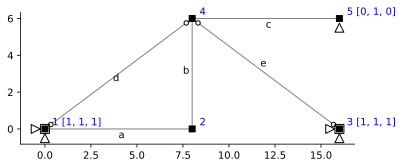

In [4]:
fig, ax = plt.subplots(1,1)
em.plot_structure(mdl, ax)
# U_disp = em.analysis.SolveDispl(mdl) 
# em.plot_U(mdl, U_disp, ax, scale=100)

In [5]:
mdl.redundant(e['c'], '2')
mdl.redundant(e['d'], '1')
mdl.redundant(e['e'], '1')

In [6]:
B = em.B_matrix(mdl)
B.barx

,$c_2$,$d_1$,$e_1$
$a_1$,0.000,-0.8,0.8
$a_2$,2.000,-0.0,9.6
$a_3$,-1.000,4.8,-4.8
$b_1$,-0.125,-0.6,-0.6
$b_2$,1.000,-4.8,4.8
$b_3$,-1.000,0.0,0.0
$c_1$,0.000,0.0,0.0
$c_2$,1.000,0.0,0.0
$c_3$,0.000,0.0,0.0
$d_1$,0.000,1.0,0.0
